In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jack0\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.8.0'

## Tensor 정의

In [4]:
a = tf.constant(5)
b = tf.constant(10)
c = tf.constant(15)

In [5]:
string = tf.constant('tensorflow')
print(string)

tf.Tensor(b'tensorflow', shape=(), dtype=string)


tensor를 numpy로

In [6]:
print('tensor a:',a) # tensor
print('numpy a :', a.numpy()) # numpy

tensor a: tf.Tensor(5, shape=(), dtype=int32)
numpy a : 5


tensor 랜덤 생성

In [7]:
rand_tensor = tf.random.normal(shape=(2,2), mean=0., stddev=1.) # random.normal : normal 정규분포에서 랜덤하게 추출
print('rand_tensor:', rand_tensor, rand_tensor.shape)

rand_tensor: tf.Tensor(
[[ 1.4189628  1.3524977]
 [-1.0291979  0.856922 ]], shape=(2, 2), dtype=float32) (2, 2)


In [8]:
rand_tensor = tf.random.uniform(shape=(2,2), minval=0., maxval=1.)
print('rand_tensor:', rand_tensor, rand_tensor.shape)

rand_tensor: tf.Tensor(
[[0.71352255 0.19333792]
 [0.52763414 0.39766002]], shape=(2, 2), dtype=float32) (2, 2)


## 텐서 연산

tensor 인덱싱과 슬라이싱

In [9]:
x_tensor = tf.constant([[1,2,3],[4,5,6]])
x_tensor

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [10]:
print('first row:',x_tensor[0])
print('second row:',x_tensor[1])
print('last row:',x_tensor[-1,:])

print('-'*40)

print('first column:',x_tensor[:,0])
print('second column:',x_tensor[:,1])
print('last column:',x_tensor[:,-1])

print('-'*40)

print('second row, last column:',x_tensor[1,2])

first row: tf.Tensor([1 2 3], shape=(3,), dtype=int32)
second row: tf.Tensor([4 5 6], shape=(3,), dtype=int32)
last row: tf.Tensor([4 5 6], shape=(3,), dtype=int32)
----------------------------------------
first column: tf.Tensor([1 4], shape=(2,), dtype=int32)
second column: tf.Tensor([2 5], shape=(2,), dtype=int32)
last column: tf.Tensor([3 6], shape=(2,), dtype=int32)
----------------------------------------
second row, last column: tf.Tensor(6, shape=(), dtype=int32)


tensor concatenate

In [11]:
x_tensor = tf.constant([[1,2,3],[4,5,6]])

concatenated_dim0 = tf.concat([x_tensor,x_tensor], axis=0)
print('axis=0:', concatenated_dim0, concatenated_dim0.shape)

print('-'*40)

concatenated_dim1 = tf.concat([x_tensor,x_tensor], axis=1)
print('axis=1:', concatenated_dim1, concatenated_dim1.shape)

axis=0: tf.Tensor(
[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]], shape=(4, 3), dtype=int32) (4, 3)
----------------------------------------
axis=1: tf.Tensor(
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]], shape=(2, 6), dtype=int32) (2, 6)


tensor 크기 변경 : reshape

In [12]:
print('x_tensor:', x_tensor, x_tensor.shape)

print('-'*40)

print('x_tensor reshape - 2x3 to 3x2 : ', tf.reshape(x_tensor,(3,2)))

x_tensor: tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32) (2, 3)
----------------------------------------
x_tensor reshape - 2x3 to 3x2 :  tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


산술 연산

In [14]:
a, b, c

(<tf.Tensor: shape=(), dtype=int32, numpy=5>,
 <tf.Tensor: shape=(), dtype=int32, numpy=10>,
 <tf.Tensor: shape=(), dtype=int32, numpy=15>)

In [16]:
add = tf.add(a,b)
print('add:', add)

sub = tf.subtract(a,b)
print('sub:', sub)

mul = tf.multiply(a,b)
print('mul:', mul)

div = tf.divide(a,b)
print('div:', div)

mean = tf.reduce_mean([a,b,c]) # 평균 : reduce_mean
print('mean:', mean)

sum = tf.reduce_sum([a,b,c]) # 합산 : reduce_sum
print('sum:', sum)

add: tf.Tensor(15, shape=(), dtype=int32)
sub: tf.Tensor(-5, shape=(), dtype=int32)
mul: tf.Tensor(50, shape=(), dtype=int32)
div: tf.Tensor(0.5, shape=(), dtype=float64)
mean: tf.Tensor(10, shape=(), dtype=int32)
sum: tf.Tensor(30, shape=(), dtype=int32)


In [17]:
# Matrix Multiplication

x_tensor1 = tf.constant([[1,2,3],[4,5,6]])
x_tensor2 = tf.constant([[7,8,9],[10,11,12]])

mat_mul = tf.matmul(x_tensor1, tf.transpose(x_tensor2))
# tf.transpose : 행렬 곱을 만들기 위해 x_tensor2를 transpose 취함

print('mat_mul:', mat_mul, mat_mul.shape)

mat_mul: tf.Tensor(
[[ 50  68]
 [122 167]], shape=(2, 2), dtype=int32) (2, 2)


In [18]:
x_tensor1, tf.transpose(x_tensor2)

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]])>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7, 10],
        [ 8, 11],
        [ 9, 12]])>)

## 데이터

In [19]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
print('train data:', train_images.shape, len(train_labels))
print('train labels:', train_labels)
print('test data:', test_images.shape, len(test_labels))
print('test labels:', test_labels)

train data: (60000, 28, 28) 60000
train labels: [5 0 4 ... 5 6 8]
test data: (10000, 28, 28) 10000
test labels: [7 2 1 ... 4 5 6]


In [22]:
import matplotlib.pyplot as plt

In [27]:
train_images[1].shape

(28, 28)

label: 0


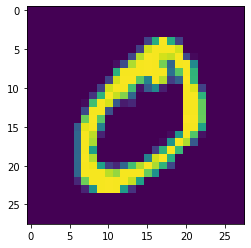

In [26]:
image = train_images[1]
plt.imshow(image)
print('label:',train_labels[1])